In [42]:
import numpy as np
from layers import OneLayer, TwoLayerNet
from numerical_gradient import numerical_gradient
from loss import cross_entropy_error
from activation import relu, softmax

In [2]:
def make_one(x):
    if x.ndim == 2:
        x = np.ravel(x.values)
    t = np.zeros((x.size,np.unique(x).size))
    for i in range(t.shape[0]):
        t[i,x[i]] = 1
    return t

In [22]:
from sklearn.datasets import load_wine
from sklearn.datasets import load_iris
X = load_wine()['data']
y = load_wine()['target']
# X = load_iris()['data']
# y = load_iris()['target']
t = make_one(y)

In [23]:
input_size = X.shape[1]
hidden_size = 5
output_size = t.shape[1]
model = TwoLayerNet(input_size=input_size, hidden_size=hidden_size,output_size=output_size)

In [24]:
epochs = 10000
lr = 1e-3
model.train(epochs,lr,X,t)

In [25]:
model.accuracy(X,t)

0.2696629213483146

In [139]:
def prob(x):
    return x/np.sum(x)

In [146]:
prob(x)

array([[0.21428571, 0.28571429, 0.5       ]])

In [143]:
np.sum(prob(x))
np.sum(softmax(x))

1.0

In [145]:
x = np.array([[.3,.4,.7]])
softmax(x)

array([[0.27800979, 0.30724834, 0.41474187]])

In [177]:
class MultiLayerNet:
    def __init__(self,input_size,hidden_size,output_size):
        hidden_size.append(output_size)
        self.W = {}
        self.W = {}
        self.W['Input'] = np.random.randn(input_size,hidden_size[0])
        self.W['Input_b'] = np.random.randn(hidden_size[0])
        for i in range(1,len(hidden_size)-1):
            w = 'W'+str(i)
            b = 'b'+str(i)
            self.W[w] = np.random.randn(hidden_size[i],hidden_size[i+1])
            self.W[b] = np.random.randn(hidden_size[i+1])      
    
    def predict(self,x):
        j = 0
        for i in range(len(self.W)):
            if j % 2 == 0 and i >= (len(self.W)-2):
                x = relu(np.dot(x,self.W[list(self.W.keys())[i]]) + self.W[list(self.W.keys())[i+1]])
            elif j % 2 == 0 and i < (len(self.W)-2):
                x = (np.dot(x,self.W[list(self.W.keys())[i]]) + self.W[list(self.W.keys())[i+1]])
            j += 1
        return softmax(x)
    
    def loss(self,x,t):
        y = self.predict(x)
        return cross_entropy_error(y,t)
    
    def numerical_gradient(self,x,t):
        f = lambda W: self.loss(x,t)
        grads = {}
        for key in self.W.keys():
            grads[key] = numerical_gradient(f,self.W[key])
        return grads
    
    def accuracy(self,x,t):
        y = np.argmax(self.predict(x),axis=1)
        t = np.argmax(t, axis=1)
        acc = np.sum(y==t)/y.size
        return acc
    
    def fit(self,epochs,lr,x,t,verbos=1):
        for epoch in range(epochs):
            for key in self.W.keys():
                self.W[key] -= lr*self.numerical_gradient(x,t)[key]
            if verbos == 1:
                print(epoch,":epoch============== accuracy: ",self.accuracy(x,t),"==========loss :", self.loss(x,t))
        
            
        
        

In [178]:
model = MultiLayerNet(3,[3,3,4,5,7],10)

In [174]:
t.shape

(10, 10)

In [179]:
x = np.random.randn(10,3)
model.fit(1000,1e-3,x,t)

0 :epoch============== accuracy:  0.1 ==========loss : 14.4617558889256
1 :epoch============== accuracy:  0.1 ==========loss : 14.45972633838424
2 :epoch============== accuracy:  0.1 ==========loss : 14.4575062338083
3 :epoch============== accuracy:  0.1 ==========loss : 14.455068029786371
4 :epoch============== accuracy:  0.1 ==========loss : 14.452378922320355
5 :epoch============== accuracy:  0.1 ==========loss : 14.449399665909539
6 :epoch============== accuracy:  0.1 ==========loss : 14.446081867452023
7 :epoch============== accuracy:  0.1 ==========loss : 14.442366846019928
8 :epoch============== accuracy:  0.1 ==========loss : 14.43818752939155
9 :epoch============== accuracy:  0.1 ==========loss : 14.433460373884492
10 :epoch============== accuracy:  0.1 ==========loss : 14.42808441319275
11 :epoch============== accuracy:  0.1 ==========loss : 14.421938151143006
12 :epoch============== accuracy:  0.1 ==========loss : 14.414876637981596
13 :epoch============== accuracy:  0.1 ===

In [26]:
class ThreeLayerNet:
    def __init__(self,input_size,hidden_size1,hidden_size2,output_size):
        self.W = {}
        self.W['Input'] = np.random.randn(input_size,hidden_size1)
        self.W['Input_b'] = np.random.randn(hidden_size1)
        self.W['W1'] = np.random.randn(hidden_size1,hidden_size2)
        self.W['b1'] = np.random.randn(hidden_size2)
        self.W['W2'] = np.random.randn(hidden_size1,hidden_size2)
        self.W['b2'] = np.random.randn(hidden_size2)

        self.W['Output'] = np.random.randn(hidden_size2,output_size)
        self.W['Output_b'] = np.random.randn(output_size)
        self.loss_val = []
    
    def predict(self,x):
        W1 = self.W['W1']
        W2 = self.W['W2']
        W3 = self.W['W3']
        b1 = self.W['b1']
        b2 = self.W['b2']
        b3 = self.W['b3']
        
        a1 = np.dot(x,W1) + b1 
        z1 = relu(a1)
        a2 = np.dot(z1,W2) + b2
        z2 = relu(a2)
        a3 = np.dot(z2,W3) + b3
        out = softmax(a3)
        return out
    
    def loss(self,x,t):
        y = self.predict(x)
        loss = cross_entropy_error(y,t)
        return loss

    def numerical_gradient(self,x,t):
        f = lambda W: self.loss(x,t)
        
        grads = {}
        grads['W1'] = numerical_gradient(f, self.W['W1'])
        grads['b1'] = numerical_gradient(f, self.W['b1'])
        grads['W2'] = numerical_gradient(f, self.W['W2'])
        grads['b2'] = numerical_gradient(f, self.W['b2'])
        grads['W3'] = numerical_gradient(f, self.W['W3'])
        grads['b3'] = numerical_gradient(f, self.W['b3'])
        
        return grads

    
    def accuracy(self,x,t):
        y = self.predict(x)
        y = np.argmax(y,axis=1)
        t = np.argmax(t,axis=1)
        acc = sum(y == t)/x.shape[0]
        return acc
    
    def fit(self,epochs,lr,x,t):
        for epoch in range(epochs):
            grads = self.numerical_gradient(x,t)
            for key in grads.keys():
                self.W[key] -= lr*grads[key]
            self.loss_val.append(self.loss(x,t))

In [29]:
from sklearn.datasets import load_digits

In [35]:
X = load_digits()['data']
y = load_digits()['target']
t = make_one(y)

In [36]:
input_size = X.shape[1]
output_size = t.shape[1]
hidden_size1 = 10
hidden_size2 = 5

In [37]:
model = ThreeLayerNet(input_size,hidden_size1,hidden_size2,output_size)

In [48]:
model.fit(1,1e-3,X,t)

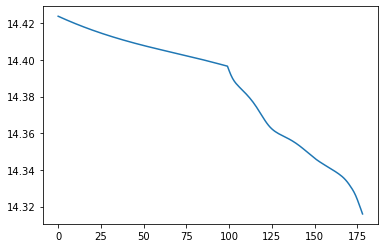

In [49]:
import matplotlib.pyplot as plt
plt.plot(np.arange(len(model.loss_val)),model.loss_val)

In [50]:
model.accuracy(X,t)

0.11018363939899833